<a href="https://colab.research.google.com/github/chirudukuru/cvd-Covid19/blob/main/CVD_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardiovascularcovid.csv to cardiovascularcovid (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cardiovascularcovid.csv']))

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[ 36.   49.    1.    1.   38.6   1.    0.    1.   99.   80.   16.    2.
    0.   99.   21.  121.   78.    0.    0. ]
 [ 35.   56.    0.    1.   39.2   1.    0.    0.   79.   92.   24.    2.
    1.   79.   21.  151.   72.    1.    7. ]
 [  8.   51.    1.    1.   39.4   1.    0.    1.   96.  124.   24.    3.
    0.   96.   21.  130.   75.    1.    0. ]
 [ 15.   62.    1.    1.   38.3   1.    0.    1.   94.   87.   20.    2.
    0.   94.   21.  100.   60.    1.    0. ]
 [ 47.   56.    1.    0.   37.5   0.    1.    1.  100.   90.   14.    3.
    0.  100.   21.  190.   95.    1.    0. ]
 [ 19.   66.    1.    1.   38.5   0.    1.    0.   98.   96.   14.    1.
    1.   98.   21.  140.   80.    0.    2. ]
 [ 49.   37.    0.    0.   36.3   1.    0.    0.   97.   70.    8.    1.
    0.   97.   21.  112.   75.    1.    0. ]
 [ 43.   60.    1.    1.   37.5   1.    0.    0.   98.  106.   14.    1.
    0.   98.   21.  130.   70.    0.    0. ]
 [ 16.   69.    1.    1.   37.3   1.    0.    0.   84.  

In [ ]:
print(X_test)

[[ 30.   56.    1.    1.   38.4   1.    0.    0.   94.  124.   18.    3.
    1.   94.   21.  137.   91.    1.    7. ]
 [ 12.   49.    1.    0.   36.7   1.    1.    1.   92.   74.   16.    1.
    1.   87.   21.  167.   76.    0.    2. ]
 [ 11.   52.    0.    0.   38.    1.    0.    0.   93.   66.   22.    3.
    0.   93.   21.  150.   82.    0.    0. ]
 [ 23.   62.    1.    0.   37.5   1.    0.    0.   97.   72.   19.    2.
    0.   97.   21.  119.   76.    0.    0. ]
 [  3.   58.    1.    0.   37.5   1.    0.    0.   94.   82.   16.    1.
    0.   94.   21.  110.   70.    1.    0. ]
 [ 29.   55.    1.    1.   39.    1.    0.    0.   93.   98.   20.    3.
    1.   93.   28.  160.   90.    0.    4. ]
 [ 46.   57.    1.    1.   38.    1.    0.    0.   97.   71.   16.    3.
    1.   97.   21.  140.   88.    1.    2. ]
 [ 33.   59.    1.    1.   39.    1.    0.    0.   95.  115.   14.    3.
    1.   95.   21.  119.   83.    1.    8. ]
 [ 27.   57.    1.    1.   36.4   0.    0.    0.   98.  

In [ ]:
print(y_train)

[1 2 1 1 1 3 1 1 3 1 1 1 1 1 2 3 1 1 1 1 3 1 1 1 2 3 1 2 1 1 1 1 1 1 1 1 1
 1]


In [ ]:
print(y_test)

[1 1 1 1 1 3 3 1 1 1 1 3 2]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)


In [ ]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 3]
 [1 3]
 [3 1]
 [1 1]
 [1 1]
 [1 1]
 [1 3]
 [1 2]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7 0 2]
 [1 0 0]
 [3 0 0]]


0.5384615384615384

In [ ]:
df

,Case,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
0,1,59,1,1,36.2,1,1,1,95,80,16,1,0,95,21,120,70,0,0,1
1,2,52,1,1,37.8,0,0,0,99,115,18,3,1,99,24,70,40,1,4,1
2,3,58,1,0,37.5,1,0,0,94,82,16,1,0,94,21,110,70,1,0,1
3,4,55,1,1,39.5,1,0,0,96,89,18,2,1,96,21,110,80,1,1,1
4,5,40,1,1,38.0,1,1,0,98,90,15,2,0,98,21,115,70,0,0,1
5,6,49,1,1,38.1,1,0,0,93,100,22,3,1,93,35,120,70,1,6,1
6,7,44,1,0,36.7,0,0,0,98,78,18,1,0,98,21,135,90,0,0,1
7,8,51,1,1,39.4,1,0,1,96,124,24,3,0,96,21,130,75,1,0,1
8,9,58,1,1,35.5,1,0,0,95,117,43,3,1,95,60,177,80,0,1,3
9,10,67,1,1,37.8,1,0,0,90,90,16,2,0,90,21,141,74,0,0,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


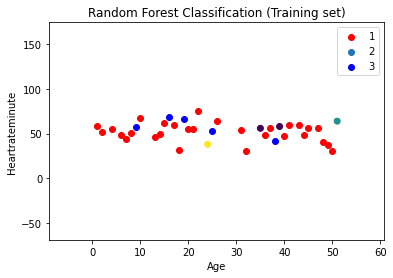

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 100, stop = X_set[:, 1].max() + 100, step = 0.25))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Heartrateminute')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


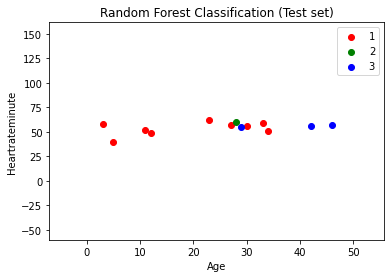

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 100, stop = X_set[:, 1].max() + 100, step = 0.25))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Heartrateminute')
plt.legend()
plt.show()